<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/Task5_Mini_substation_omdena3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import os

In [ ]:
## Functions to use

def read_data(datafile, dateCol):
    ''' Read the excel file'''
    df = pd.read_excel(datafile, index_col= dateCol, parse_dates=True)
    return df
    
def info_data(datafile, info = False, head = True, shape = True):
    ''' Look at the info of the data'''
    
    if not isinstance(datafile, pd.DataFrame):
        df = read_data(datafile)
    else:
        df = datafile
    
    ## Information of data
    if info:
        df.info()
        
    print('--------------------------------------------------------------------')
    print('First rows')
    # Show first rows
    if head:
        print(df.head())
        
    print('--------------------------------------------------------------------')
    print('Dimension of the data')
    ## Dimension of data
    if shape:
        print(f'This data has {df.shape[0]} rows and {df.shape[1]} variables') 
        
        
def find_unique(df, col):
    ''' Find the unique values of a columns'''
    return df[col].nunique()

### Look at the statistical description of data
def describe(df, col = None):
    ''' Give the statistic summary'''
    
    ## Summary statistic
    if col is not None:
        stat = df[col].describe()
    else:
        stat = df.describe()

    ## Change the name of the 50% index to median
    idx = stat.index.tolist()
    idx[5] = 'median'
    stat.index = idx
    return stat

def missing_val(data):
    ''' Find the percentage of missing values
    on each column of a dataframe'''
    
    ## percentage of missing values
    n = data.isnull().sum().sort_values(ascending=False)/ len(data) * 100
    return n
  
def boxHist(df, col):
    ''' Create the boxplot and histogram'''
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (10,6))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False, return_type='dict')
    
    ## Plot the histogram
    temp = df[col].values
    ax[1].hist(temp, bins = 75)
    plt.xlabel(col)
    return [col]

def valCount(data, col, perc = False):
    ''' calculate the proportion in fraction or percentage'''
    if not perc:
      return data[col].value_counts()
    else:
      return data[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'    
    
def make_chart_histogram(data, col = None, subplots=True, layout = None, figsize = None, sharex = False, bins = None):
    ''' Create histogram from numerical variable'''
    
    if col is not None:
        return df[col].hist(bins = bins)
    else:
        return data.plot.hist(subplots=True, layout = layout, figsize = figsize, sharex=False, bins = bins)
    
    
def plotCounts(data, col, kind = 'barh', perc = False):
    ''' Plot the proportion of a categorical variables'''
    if not perc:
        return data[col].value_counts().plot(kind = kind)
    else:
        return data[col].value_counts(normalize = True).mul(100).round(2).plot(kind = kind)

    
def convert_date(df, column_name):
    return pd.to_datetime(df[column_name])

def convertTime(df, column_name):
    return pd.to_timedelta(df[column_name])

def date_cols(data, col):
    ''' Create year, month, month name and day from a datetime column'''
    #data[col] = convert(data, col)
    
    data['Year'] = pd.DatetimeIndex(data[col]).year
    data['Month'] = pd.DatetimeIndex(data[col]).month
    data['Day'] = pd.DatetimeIndex(data[col]).day
    data['weekday'] = pd.DatetimeIndex(data[col]).weekday
    data['weekday_name'] = pd.DatetimeIndex(data[col]).day_name()
    data['Hour'] = pd.DatetimeIndex(data[col]).hour

    return data    


### plots groupbyfunction
def plots(data, col1 , col2, func, title, t = 'line'):
    ''' Plotting plots from groupby'''
    
    data.groupby(col1)[col2].agg(func).plot(kind = t)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

def groupDat(data, col1 , col2, func):
    ''' Create groupby'''
    
    return data.groupby(col1)[col2].agg(func)     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/NeedEnergy/data for Mini Substation.zip') # zipped file.

In [ ]:
zipfile.ZipFile.namelist(zf)

['data for Mini Substation/Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes 1.csv',
 'data for Mini Substation/Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.csv',
 'data for Mini Substation/Electricity usage - 2020-01-01 - 2021-02-05 - hourly.csv']

we have 2 files with 5 mins.

In [ ]:
listfiles = zipfile.ZipFile.namelist(zf)

In [ ]:
dfs = [pd.read_csv(zf.open(file), sep = '\t') for file in listfiles]

In [ ]:
df_1min = dfs[0]
df_5min = dfs[1]
df_hour = dfs[-1]

## EDA OF Mini Substation/Electricity usage 5 MIN

In [ ]:
df_1min.head()

,Date,Consumption [kW],Always on [kW]
0,2/5/2021 10:35,73.216,43.664
1,2/5/2021 10:30,78.952,43.664
2,2/5/2021 10:25,80.805,43.664
3,2/5/2021 10:20,77.036,43.664
4,2/5/2021 10:15,81.556,43.664


In [ ]:
info_data(df_1min, info = True, head = True, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4933 non-null   object 
 1   Consumption [kW]  4933 non-null   float64
 2   Always on [kW]    4933 non-null   float64
dtypes: float64(2), object(1)
memory usage: 115.7+ KB
--------------------------------------------------------------------
First rows
             Date  Consumption [kW]  Always on [kW]
0  2/5/2021 10:35            73.216          43.664
1  2/5/2021 10:30            78.952          43.664
2  2/5/2021 10:25            80.805          43.664
3  2/5/2021 10:20            77.036          43.664
4  2/5/2021 10:15            81.556          43.664
--------------------------------------------------------------------
Dimension of the data
This data has 4933 rows and 3 variables


In [ ]:
missing_val(df_1min)

Always on [kW]      0.0
Consumption [kW]    0.0
Date                0.0
dtype: float64

In [ ]:
df_1min.nunique()

Date                4933
Consumption [kW]    4727
Always on [kW]        30
dtype: int64

In [ ]:
describe(df_1min)

,Consumption [kW],Always on [kW]
count,4933.000000,4933.000000
mean,81.027656,34.855992
std,18.011931,13.684918
min,43.448000,9.265000
25%,67.718000,39.464000
median,76.987000,41.272000
75%,91.519000,42.658000
max,151.303000,50.198000


The consumption go from 43 to 151 KW with a mean of 81 KW

['Consumption [kW]']

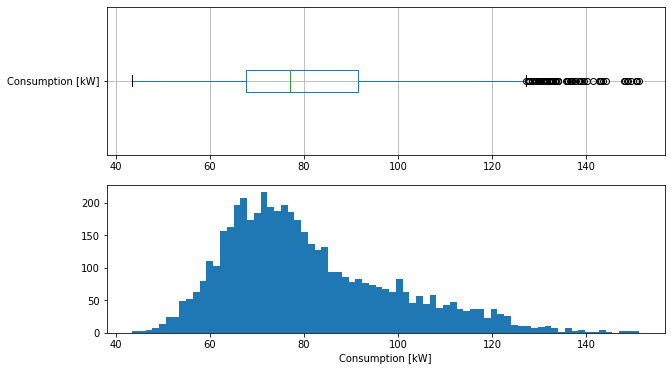

In [ ]:
boxHist(df_1min, 'Consumption [kW]')

['Always on [kW]']

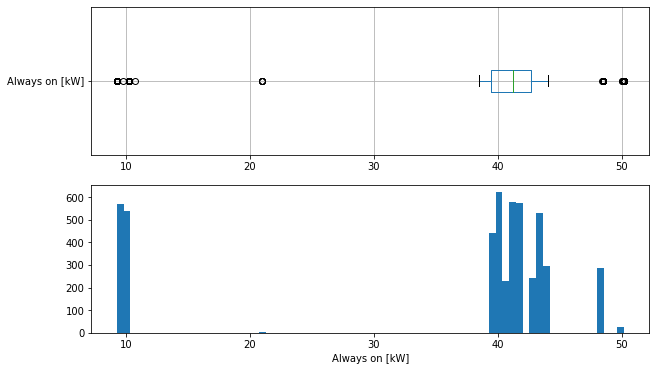

In [ ]:
boxHist(df_1min, 'Always on [kW]')

In [ ]:
## convert date to datetime and create date attribute
df_1min = date_cols(df_1min, 'Date')

In [ ]:
df_1min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4933 non-null   object 
 1   Consumption [kW]  4933 non-null   float64
 2   Always on [kW]    4933 non-null   float64
 3   Year              4933 non-null   int64  
 4   Month             4933 non-null   int64  
 5   Day               4933 non-null   int64  
 6   weekday           4933 non-null   int64  
 7   weekday_name      4933 non-null   object 
 8   Hour              4933 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 347.0+ KB


In [ ]:
df_1min.head()

,Date,Consumption [kW],Always on [kW],Year,Month,Day,weekday,weekday_name,Hour
0,2/5/2021 10:35,73.216,43.664,2021,2,5,4,Friday,10
1,2/5/2021 10:30,78.952,43.664,2021,2,5,4,Friday,10
2,2/5/2021 10:25,80.805,43.664,2021,2,5,4,Friday,10
3,2/5/2021 10:20,77.036,43.664,2021,2,5,4,Friday,10
4,2/5/2021 10:15,81.556,43.664,2021,2,5,4,Friday,10


In [ ]:
print(f'This data is for {df_1min.Year.max() - df_1min.Year.min()} years')

This data is for 0 years


In [ ]:
print(f'This data is for {df_1min.Month.max() - df_1min.Month.min()} month')

This data is for 1 month


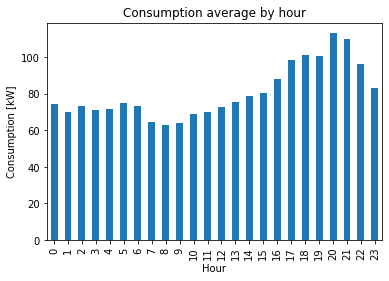

In [ ]:
## Average consumption by Hour
plots(df_1min, 'Hour' , 'Consumption [kW]', np.mean, 'Consumption average by hour', t = 'bar')

Working people as the peak is at 8 pm

In [ ]:
valCount(df_1min, 'Month', perc = False)

1    3653
2    1280
Name: Month, dtype: int64

In [ ]:
valCount(df_1min, 'weekday_name', perc = False)

Tuesday      864
Wednesday    842
Thursday     731
Friday       704
Monday       640
Sunday       576
Saturday     576
Name: weekday_name, dtype: int64

In [ ]:
df_1min['Date'] = pd.to_datetime(df_1min['Date'])

In [ ]:
df_1min.Date.max(), df_1min.Date.min()

(Timestamp('2021-02-05 10:35:00'), Timestamp('2021-01-18 18:30:00'))

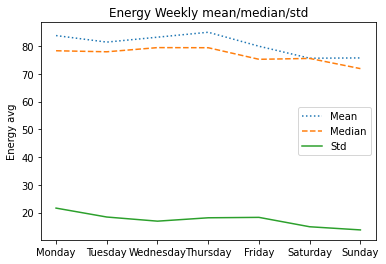

In [ ]:
### Mean, median and std of each week
order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_1min.groupby('weekday_name').agg({'Consumption [kW]': ['mean', 'median', 'std']}).reindex(index = order_week).plot(style=[':', '--', '-'])
plt.title('Energy Weekly mean/median/std')
plt.xlabel('')
plt.ylabel('Energy avg')

plt.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

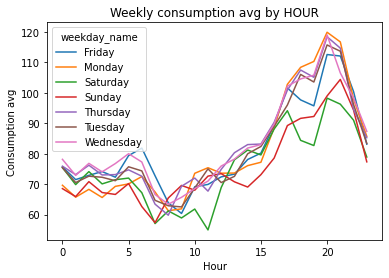

In [ ]:
### Weekly EA by HOUR
df_1min.groupby(['Hour', 'weekday_name'])['Consumption [kW]'].mean().unstack().plot()
plt.title('Weekly consumption avg by HOUR')
plt.ylabel('Consumption avg');

Low consumption during the day and go up from 15pm.

In [ ]:
df_h = df_1min.groupby(['Hour', 'weekday_name'])['Consumption [kW]'].mean().unstack()

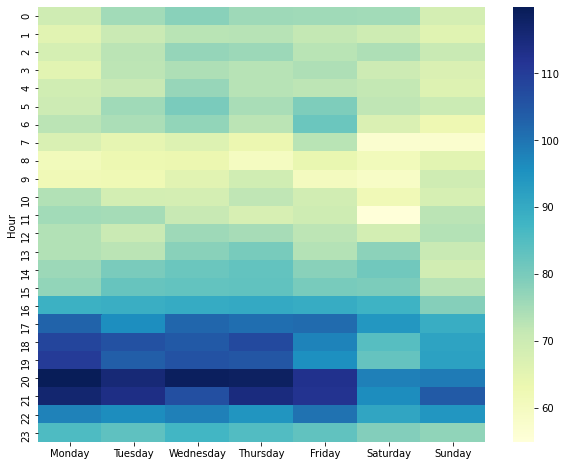

In [ ]:
df_h = df_h[order_week]
#df_hour.index.name 
df_h.columns.name = None
plt.figure(figsize=(10, 8))
sns.heatmap(df_h, cmap="YlGnBu");
#df_hour.head()

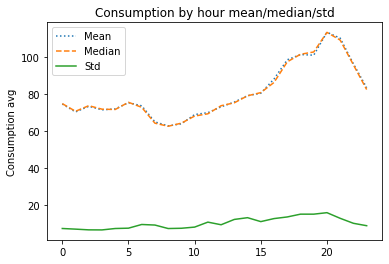

In [ ]:
df_1min.groupby('Hour').agg({'Consumption [kW]': ['mean', 'median', 'std']}).plot(style=[':', '--', '-'])
plt.title('Consumption by hour mean/median/std')
plt.xlabel('')
plt.ylabel('Consumption avg')

plt.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

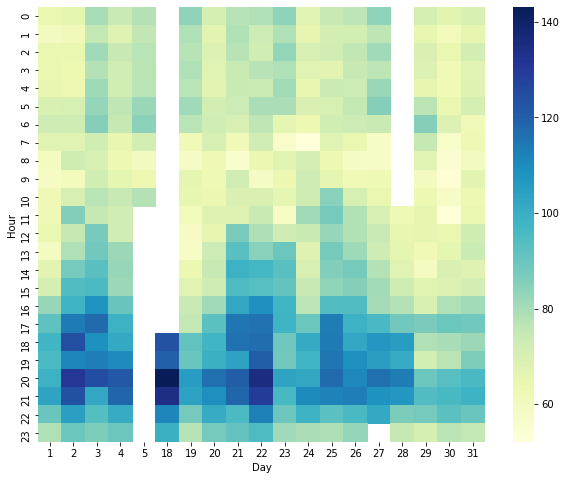

In [ ]:
df_h1 = df_1min.groupby(['Hour', 'Day'])['Consumption [kW]'].mean().unstack()
#df_hour.index.name 
#df_h1.columns.name = None
plt.figure(figsize=(10, 8))
sns.heatmap(df_h1, cmap="YlGnBu");

In [ ]:
df_1min = df_1min.sort_values(by=['Date'])

In [ ]:
df_1min.head(30)

,Date,Consumption [kW],Always on [kW],Year,Month,Day,weekday,weekday_name,Hour
4932,2021-01-18 18:30:00,131.999,9.265,2021,1,18,0,Monday,18
4931,2021-01-18 18:45:00,122.989,9.265,2021,1,18,0,Monday,18
4930,2021-01-18 18:50:00,118.954,9.265,2021,1,18,0,Monday,18
4929,2021-01-18 18:55:00,119.383,9.265,2021,1,18,0,Monday,18
4928,2021-01-18 19:00:00,115.812,9.265,2021,1,18,0,Monday,19
4927,2021-01-18 19:05:00,117.991,9.265,2021,1,18,0,Monday,19
4926,2021-01-18 19:10:00,123.967,9.265,2021,1,18,0,Monday,19
4925,2021-01-18 19:15:00,117.280,9.265,2021,1,18,0,Monday,19
4924,2021-01-18 19:20:00,117.593,9.265,2021,1,18,0,Monday,19
4923,2021-01-18 19:25:00,119.730,9.265,2021,1,18,0,Monday,19


In [ ]:
df_1min = df_1min.set_index('Date')

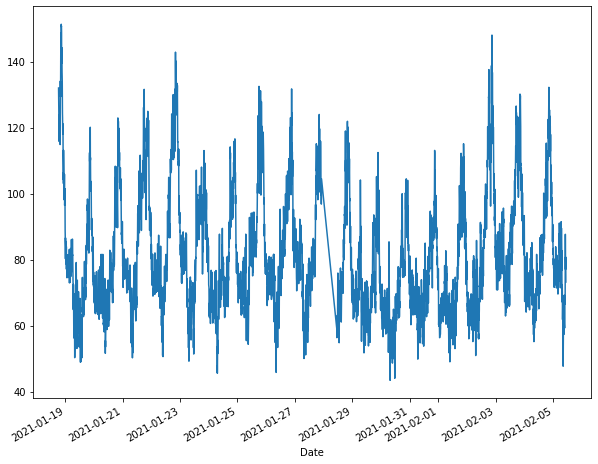

In [ ]:
plt.figure(figsize=(10, 8))
df_1min['Consumption [kW]'].plot();

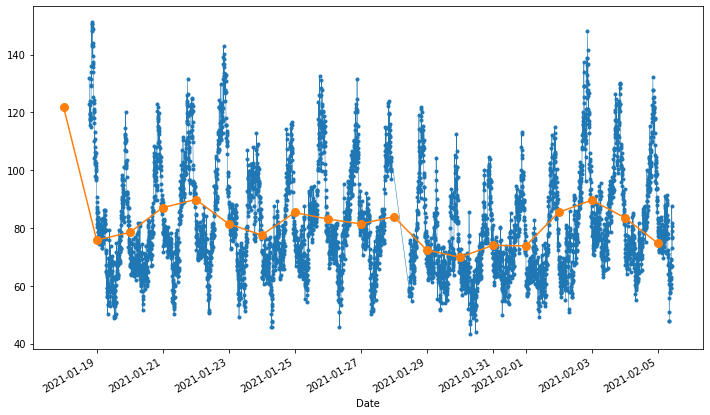

In [ ]:
plt.figure(figsize=(12, 7))
df_1min['Consumption [kW]'].plot(marker='.', linestyle='-', linewidth=0.5, label='5-mins')
df_1min['Consumption [kW]'].resample('D').mean().plot(marker='o', markersize=8, linestyle='-', label='Hourly Mean Resample');

DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others. Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.

In [ ]:
def create_season(row):
    ''' create season'''
    if row['Month'] in (1, 2, 12):
        return "Winter"
    elif row['Month'] in (3, 4, 5):
        return "Spring"
    elif row['Month'] in (6, 7, 8):
        return "Summer"
    elif row['Month'] in (9, 10, 11):
        return "Fall"
    else:
        return "Other"

def DataandResampling(data, col_date, target, resamplingperiod, label):
    ''' Plot the whole data vs. resampling mean'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = pd.to_datetime(data[col_date])

    ## Set the index to date 
    data = data.set_index(col_date) 
        
    ## plot figure    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(data[target], marker='.', linestyle='-', linewidth=0.5, label=label)
    ax.plot(data[target].resample(resamplingperiod).mean(), marker='o', markersize=6, linestyle='-', label= resamplingperiod + 'ly' + ' Mean Resample')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylabel(target)
    ax.legend(loc = 'upper right')


def YearlyDailyAgg(data, col_date, target, period):
    ''' Aggregate target by year, season, week using date column'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

    
    ## Create time features
    date_cols(data, col_date)
    
    data['weekend'] = np.where((data['weekday'] == 5) | (data['weekday'] == 6), 1 ,0) 
    data['season'] = data.apply(create_season, axis = 1)
    

    data.groupby(period)[target].mean().plot.bar(ax = ax1)
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg')

    ### Mean, median and std of each year
    data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot.bar(ax = ax2)
    ax2.set_title(target +' mean/median/std')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

    ### Consumption by HOUR
    data.groupby(['Hour', period])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
    ax3.set_title(f'{period} {target} avg by HOUR')
    ax3.set_ylabel(target + ' avg')
    ax3.set_xlim((0,25))

        
        
def MonthlyWeeklyAgg(data, col_date, target, period):
    ''' Aggregate by month, week or day'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

            
    ## Create time features
    date_cols(data, col_date)


    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    order_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    
    
    if period == 'Month':
        data["Month_name"] = data[period].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"
                                               })
        data.groupby('Month_name')[target].mean().reindex(index = order_month).plot.bar(ax = ax1)
        
        ### Mean, median and std of each year
        data.groupby('Month_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_month).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', 'Month_name'])[target].mean().unstack()
        df_hour = df_hour[order_month]
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    elif period == 'weekday':
        data['weekday_name'] = data[period].map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
        data.groupby('weekday_name')[target].mean().reindex(index = order_week).plot.bar(ax = ax1)

        ### Mean, median and std of each week
        data.groupby('weekday_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_week).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period EA by HOUR
        data.groupby(['Hour', 'weekday_name'])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
        ax3.set_title(f'{period} {target} avg')
        ax3.set_ylabel(target + ' avg')
        
    else:
        data.groupby(period)[target].mean().plot(ax = ax1)

        ### Mean, median and std of each year
        data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot(style=[':', '--', '-'], ax = ax2)

    
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', period])[target].mean().unstack()
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg') 
    
    ax2.set_title(target + ' mean/median/std')
    ax2.set_xlabel('')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std'])
  

In [ ]:
def TSAggregationEda(data, col_date, target, period):
    ''' Create time series EDA'''
   
    if period in ('Year', 'season', 'weekend'):
        YearlyDailyAgg(data, col_date, target, period)
    else:  
        MonthlyWeeklyAgg(data, col_date, target, period)


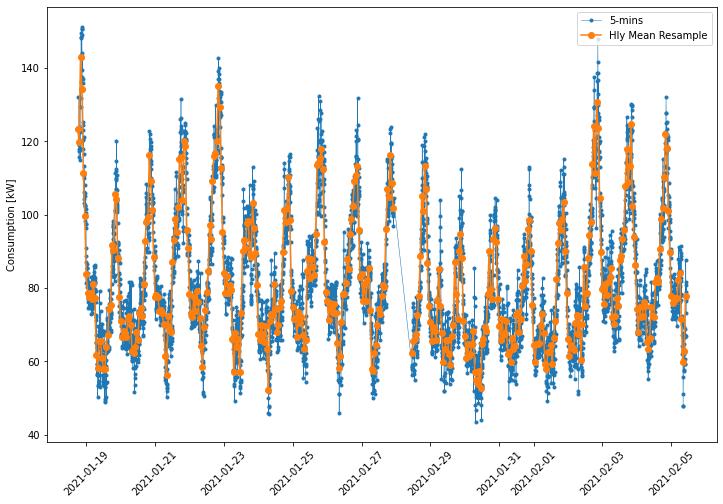

In [ ]:
#df_1min = df_1min.reset_index()
DataandResampling(df_1min, 'Date', 'Consumption [kW]', 'H', '5-mins')

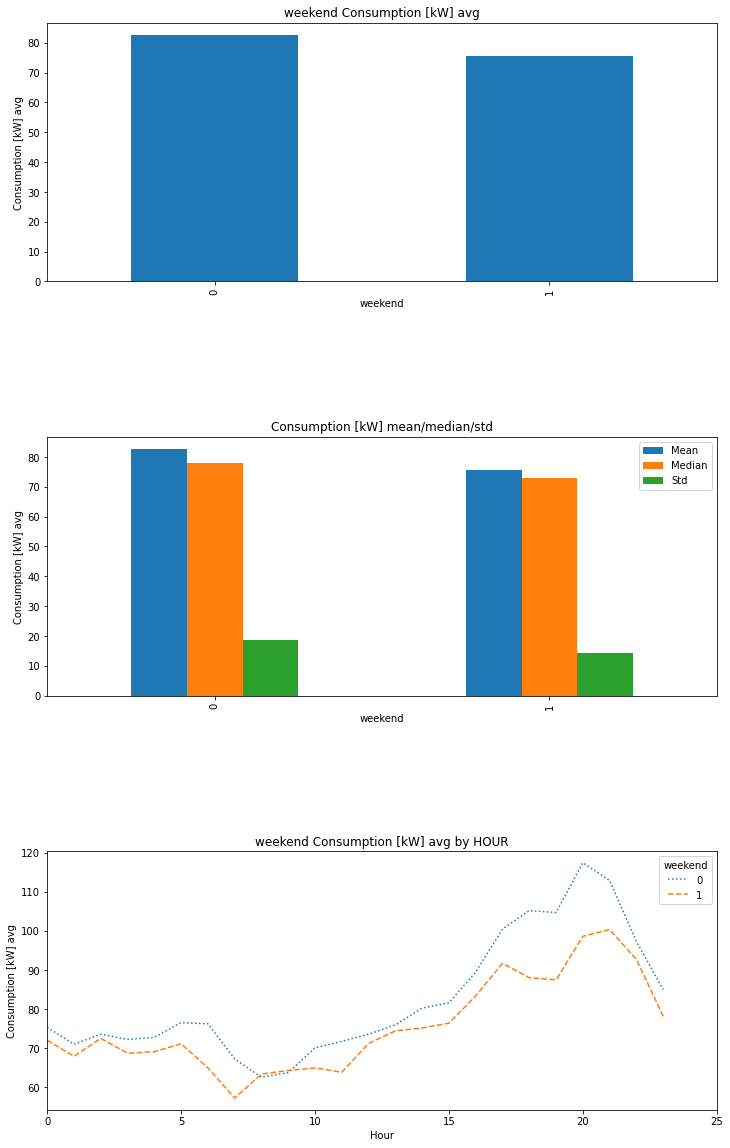

In [ ]:
TSAggregationEda(df_1min, 'Date', 'Consumption [kW]', 'weekend')

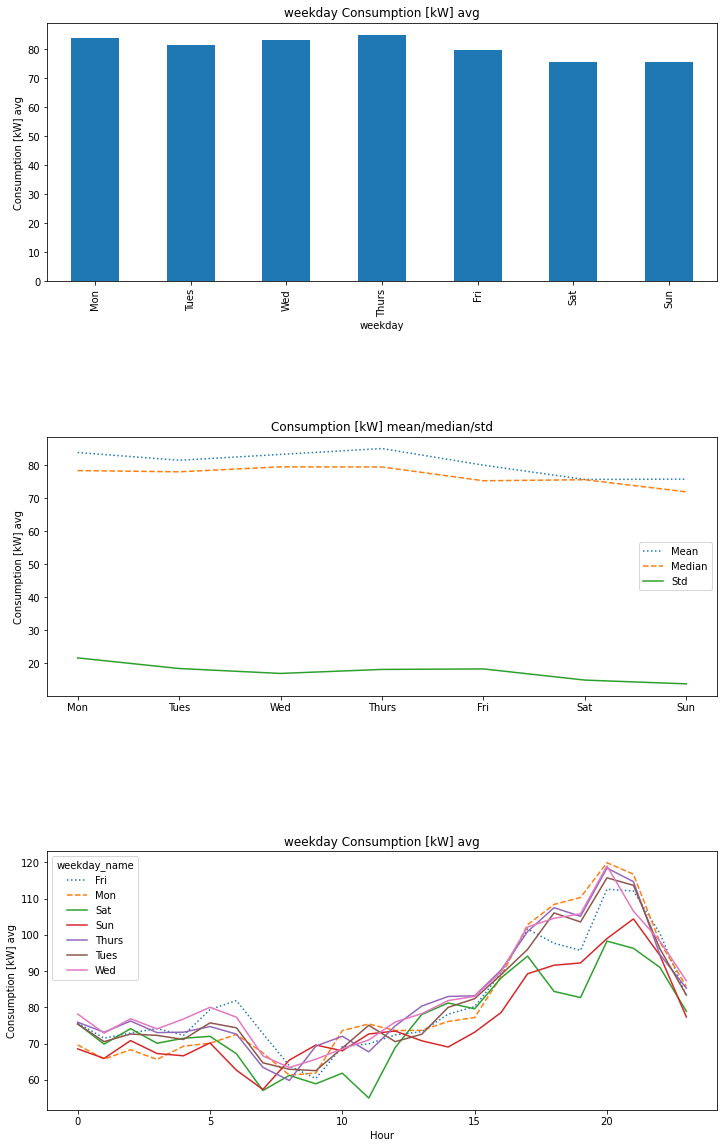

In [ ]:
TSAggregationEda(df_1min, 'Date', 'Consumption [kW]', 'weekday')

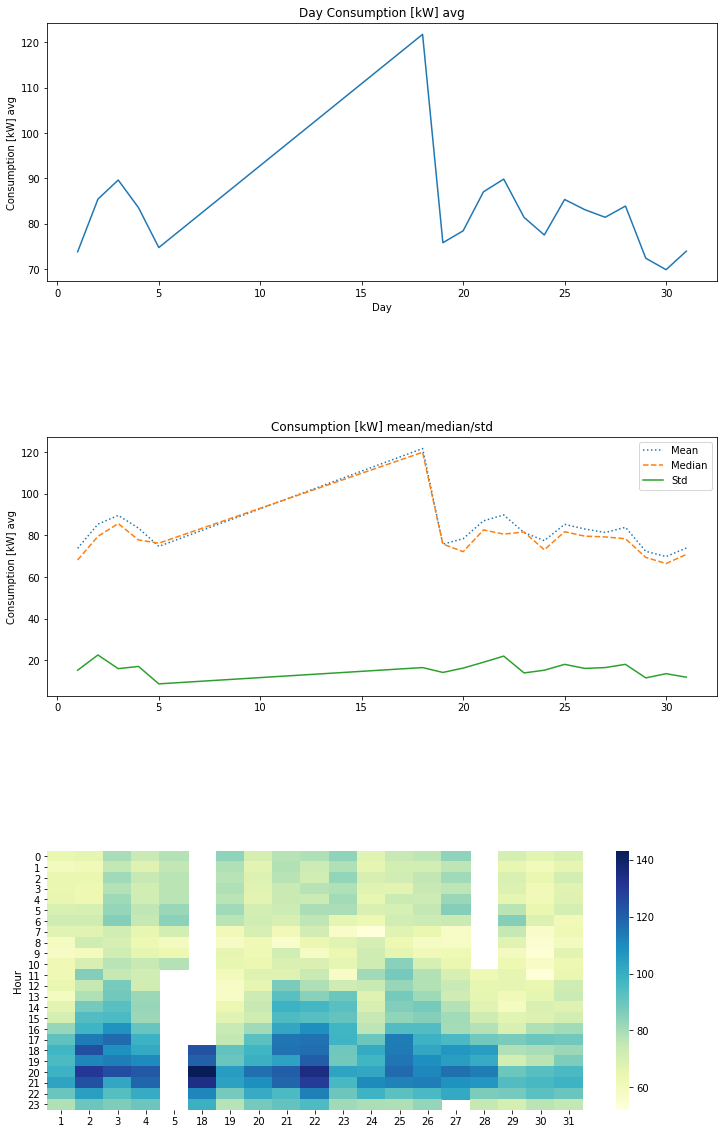

In [ ]:
TSAggregationEda(df_1min, 'Date', 'Consumption [kW]', 'Day')

## EDA OF Mini Substation/Electricity usage 5 MIN BIS

Maybe different hour...

In [ ]:
df_5min.head()

,Date,Consumption [kW],Always on [kW]
0,2/5/2021 9:00,57.388,43.664
1,2/5/2021 8:55,64.581,48.407
2,2/5/2021 8:50,66.897,48.487
3,2/5/2021 8:45,62.679,48.487
4,2/5/2021 8:40,66.498,48.487


In [ ]:
info_data(df_5min, info = True, head = True, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4914 non-null   object 
 1   Consumption [kW]  4914 non-null   float64
 2   Always on [kW]    4914 non-null   float64
dtypes: float64(2), object(1)
memory usage: 115.3+ KB
--------------------------------------------------------------------
First rows
            Date  Consumption [kW]  Always on [kW]
0  2/5/2021 9:00            57.388          43.664
1  2/5/2021 8:55            64.581          48.407
2  2/5/2021 8:50            66.897          48.487
3  2/5/2021 8:45            62.679          48.487
4  2/5/2021 8:40            66.498          48.487
--------------------------------------------------------------------
Dimension of the data
This data has 4914 rows and 3 variables


In [ ]:
df_5min.nunique()

Date                4914
Consumption [kW]    4709
Always on [kW]        30
dtype: int64

In [ ]:
describe(df_5min)

,Consumption [kW],Always on [kW]
count,4914.000000,4914.000000
mean,81.072515,34.821936
std,18.024305,13.700366
min,43.448000,9.265000
25%,67.751500,39.464000
median,77.036000,41.272000
75%,91.558750,42.658000
max,151.303000,50.198000


['Consumption [kW]']

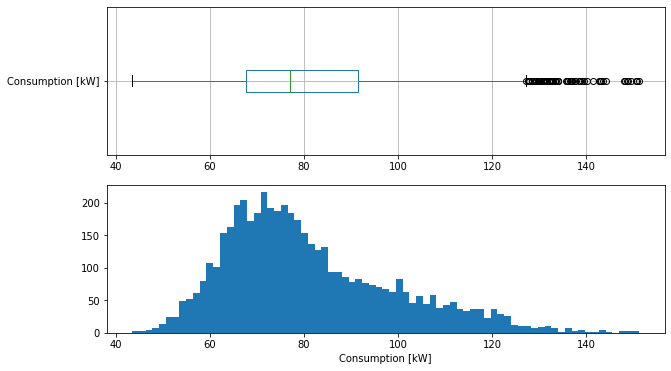

In [ ]:
boxHist(df_5min, 'Consumption [kW]')

ok same pattern as before

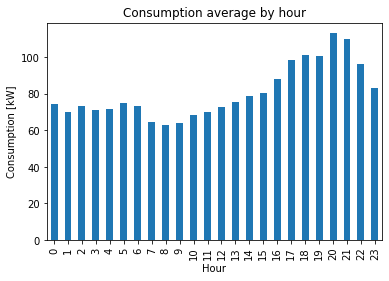

In [ ]:
## Average consumption by Hour
## convert date to datetime and create date attribute
df_5min = date_cols(df_5min, 'Date')
plots(df_5min, 'Hour' , 'Consumption [kW]', np.mean, 'Consumption average by hour', t = 'bar')

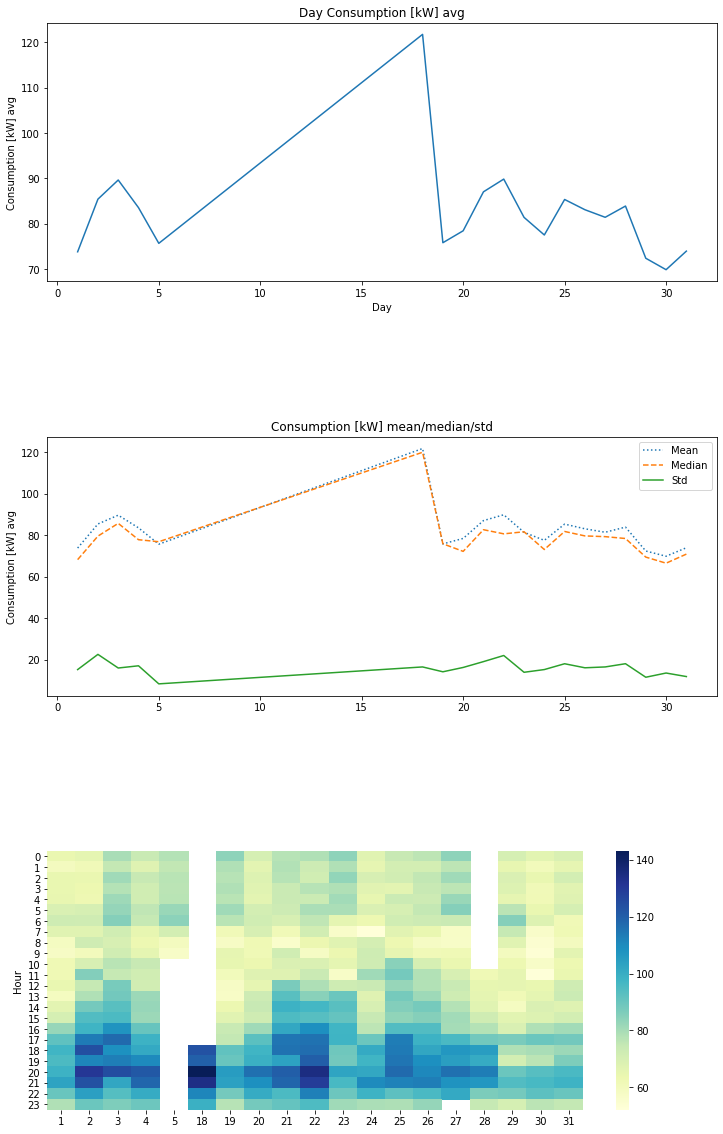

In [ ]:
TSAggregationEda(df_5min, 'Date', 'Consumption [kW]', 'Day')

## EDA OF Mini Substation/Electricity usage Hourly

In [ ]:
df_hour.head()

,Date,Consumption [kWh],Always on [kWh]
0,2/5/2021 9:00,4.782,3.639
1,2/5/2021 8:00,59.888,48.480
2,2/5/2021 7:00,71.461,48.487
3,2/5/2021 6:00,84.209,48.487
4,2/5/2021 5:00,82.169,48.487


In [ ]:
info_data(df_hour, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1368 non-null   object 
 1   Consumption [kWh]  1368 non-null   float64
 2   Always on [kWh]    1368 non-null   float64
dtypes: float64(2), object(1)
memory usage: 32.2+ KB
--------------------------------------------------------------------
First rows
--------------------------------------------------------------------
Dimension of the data
This data has 1368 rows and 3 variables


In [ ]:
df_hour.nunique()

Date                 1368
Consumption [kWh]    1341
Always on [kWh]       111
dtype: int64

In [ ]:
describe(df_hour)

,Consumption [kWh],Always on [kWh]
count,1368.000000,1368.000000
mean,72.269330,31.761269
std,16.659879,11.915691
min,4.782000,0.000000
25%,59.981250,31.286000
median,68.192000,33.650500
75%,81.837750,39.988000
max,143.077000,50.183000


The min here is 4, maybe an anomaly

['Consumption [kWh]']

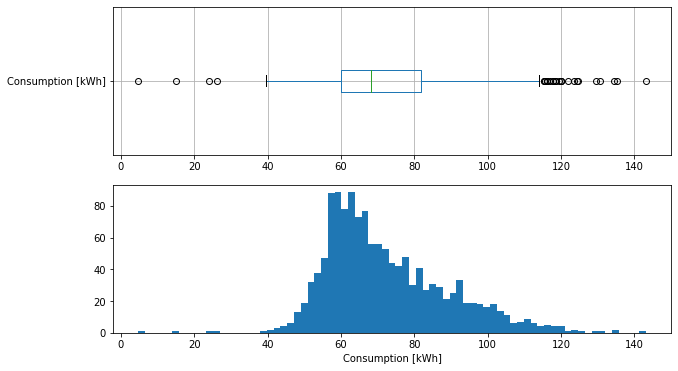

In [ ]:
boxHist(df_hour, 'Consumption [kWh]')

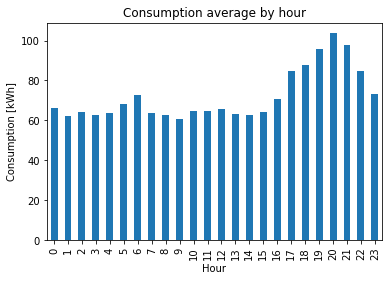

In [ ]:
## Average consumption by Hour
## convert date to datetime and create date attribute
df_hour = date_cols(df_hour, 'Date')
plots(df_hour, 'Hour' , 'Consumption [kWh]', np.mean, 'Consumption average by hour', t = 'bar')

In [ ]:
def heatmapGroupby(data, col_date, target, row , col, func):

    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
    
    ## Create time features
    order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    date_cols(data, col_date)
    data["Month_name"] = data[col].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"                                           })
    df_g = data.groupby([row, col])[target].agg(func).unstack()
    if col == 'weekday_name':
      df_g = df_g[order_week]
    else:
        df_g = df_g[order_month]
    df_g.columns.name = None
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_g, cmap="YlGnBu")


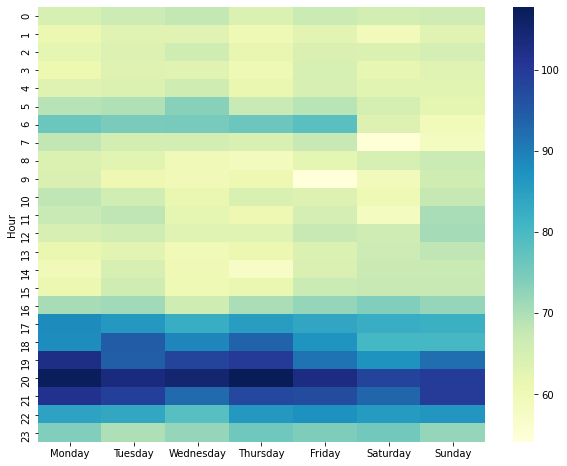

In [ ]:
heatmapGroupby(df_hour, 'Date', 'Consumption [kWh]', 'Hour' , 'weekday_name', np.mean)

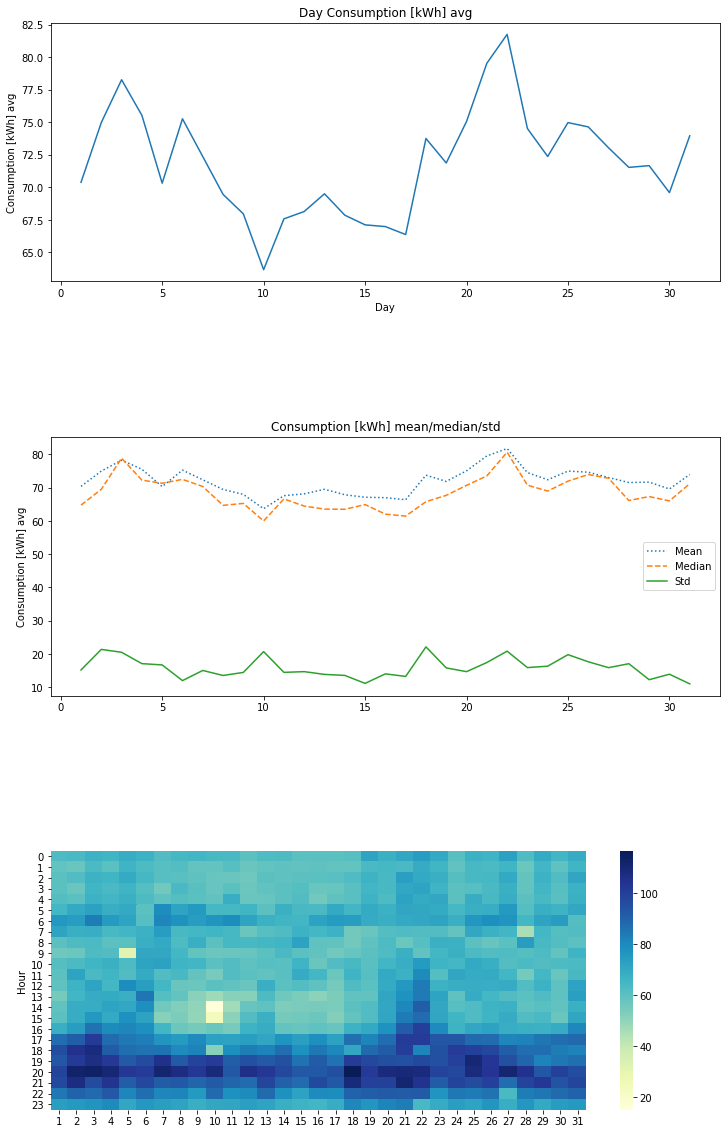

In [ ]:
TSAggregationEda(df_hour, 'Date', 'Consumption [kWh]', 'Day')